In [ ]:
from google.colab import files
uploaded = files.upload()


Saving netflix.csv to netflix (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import pandas as pd
df = pd.read_csv("netflix.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rated         8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  rating        8807 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")


In [ ]:
df["duration"] = df["duration"].astype(str).str.extract("(\d+)")[0]  # Extract only numbers
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")  # Convert to numeric


In [ ]:
df["show_id"] = pd.to_numeric(df["show_id"], errors="coerce")


In [ ]:
print(df["rating"])

0       5.522
1       5.317
2       4.747
3       4.457
4       9.430
        ...  
8802    3.543
8803    3.791
8804    3.535
8805    5.682
8806    1.235
Name: rating, Length: 8807, dtype: float64


In [ ]:
# Find the movie with the highest rating
most_watched_movie = df[df['type'] == 'Movie'].sort_values(by='rating', ascending=False).head(1)

print("Most Watched Movie (Approximate):")
print(most_watched_movie[['title', 'rating', 'release_year', 'country']])


Most Watched Movie (Approximate):
           title  rating  release_year country
2635  The Dealer  29.661          2010   Egypt


In [ ]:
#We determine the most famous actor based on appearances across multiple movies/shows.
from collections import Counter

# Drop NaN values in 'cast' column
df_cast = df.dropna(subset=['cast'])

# Split cast members, flatten the list, and count occurrences
all_actors = df_cast['cast'].str.split(', ').explode()
actor_counts = Counter(all_actors)

# Find the most frequent actor
most_famous_actor = actor_counts.most_common(1)

print("Most Famous Actor:")
print(most_famous_actor)


Most Famous Actor:
[('Anupam Kher', 43)]


In [ ]:
# prompt: give me a code to display top 10 movies of each year

# Group by release year and sort by rating within each year
top_movies_by_year = df[df['type'] == 'Movie'].groupby('release_year').apply(lambda x: x.nlargest(10, 'rating')).reset_index(drop=True)

# Display the top 10 movies for each year
for year, group in top_movies_by_year.groupby('release_year'):
    print(f"\nTop 10 Movies of {year}:")
    print(group[['title', 'rating']])



Top 10 Movies of 1942:
                  title  rating
0        Prelude to War   3.787
1  The Battle of Midway   3.550

Top 10 Movies of 1943:
                                           title  rating
2             Why We Fight: The Battle of Russia   4.395
3                WWII: Report from the Aleutians   3.581
4  Undercover: How to Operate Behind Enemy Lines   3.540

Top 10 Movies of 1944:
                                              title  rating
5                                  Tunisian Victory   4.032
6                                 The Negro Soldier   3.537
7  The Memphis Belle: A Story of a\nFlying Fortress   3.532

Top 10 Movies of 1945:
                       title  rating
8                 San Pietro   3.834
9    Know Your Enemy - Japan   3.540
10  Nazi Concentration Camps   3.540

Top 10 Movies of 1946:
                 title  rating
11  Let There Be Light    3.78

Top 10 Movies of 1947:
          title  rating
12  Thunderbolt   4.579

Top 10 Movies of 1954:
          

<ipython-input-17-69a3e9f968ce>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies_by_year = df[df['type'] == 'Movie'].groupby('release_year').apply(lambda x: x.nlargest(10, 'rating')).reset_index(drop=True)


In [ ]:
# 5. Plot Top-Rated Movie of Each Year using Plotly
import plotly.express as px

# Group by release year and find the movie with the highest rating for each year
top_rated_by_year = df[df['type'] == 'Movie'].groupby('release_year').apply(lambda x: x.nlargest(1, 'rating')).reset_index(drop=True)

# Create a bar chart with movie title in hover text
fig = px.bar(top_rated_by_year, x="release_year", y="rating",
             title="Top-Rated Movie of Each Year on Netflix",
             text="rating", color="rating", hover_data=["title", "release_year", "rating"])
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Top-Rated Movie Rating")
fig.show()

<ipython-input-18-305d99c3bcdd>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_by_year = df[df['type'] == 'Movie'].groupby('release_year').apply(lambda x: x.nlargest(1, 'rating')).reset_index(drop=True)


In [ ]:
def recommend_movies(favorite_genre, top_n=5):
    return df[df["listed_in"].str.contains(favorite_genre, case=False)].nlargest(top_n, "rating")["title"]

# Example usage: recommend movies for users who like "Drama"
print("Recommended Movies for Drama Fans:")
print(recommend_movies("Drama"))

Recommended Movies for Drama Fans:
2751    Akbar Birbal
1175       Philomena
451         Twilight
4349         Set Off
311        Control Z
Name: title, dtype: object


In [ ]:
# prompt: give a code to recommend user shows from each genre

def recommend_shows_by_genre(genre, top_n=5):
  """Recommends top N shows from a specific genre based on rating.

  Args:
    genre: The genre of shows to recommend.
    top_n: The number of top shows to recommend.

  Returns:
    A list of recommended show titles.
  """
  genre_shows = df[(df['type'] == 'TV Show') & df['listed_in'].str.contains(genre, case=False)]
  recommended_shows = genre_shows.nlargest(top_n, 'rating')['title'].tolist()
  return recommended_shows


# Example Usage
print("Recommended TV Shows for Sci-Fi Fans:")
print(recommend_shows_by_genre("Sci-Fi"))

print("\nRecommended TV Shows for Comedy Fans:")
print(recommend_shows_by_genre("Comedy"))

print("\nRecommended TV Shows for Horror Fans:")
print(recommend_shows_by_genre("Horror"))

print("\nRecommended TV Shows for Documentary Fans:")
print(recommend_shows_by_genre("Documentary"))


Recommended TV Shows for Sci-Fi Fans:
['Kid Cosmic', 'The Flash', 'Masters of the Universe: Revelation', 'Handsome Siblings', 'Manifest']

Recommended TV Shows for Comedy Fans:
['A Little Help with Carol Burnett', 'Felipe Esparza: Bad Decisions', 'Men on a Mission', 'Cheuk Wan-Chi: Two Night Stand', 'My Life My Story']

Recommended TV Shows for Horror Fans:
['ThirTEEN Terrors', 'RESIDENT EVIL: Infinite Darkness', 'Helix', 'Midnight Mass', 'The Haunting of Bly Manor']

Recommended TV Shows for Documentary Fans:
[]


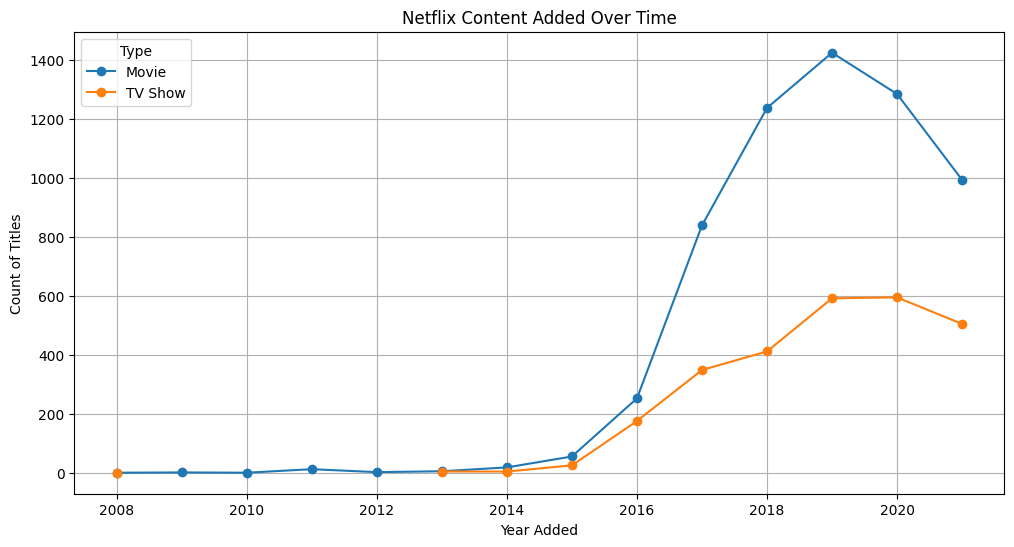

In [ ]:
#Trend Analysis of Netflix Content Over Time
import pandas as pd
import matplotlib.pyplot as plt

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Count movies and TV shows per year
content_trend = df.groupby(['year_added', 'type']).size().unstack()

# Plot the trend
content_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel("Year Added")
plt.ylabel("Count of Titles")
plt.title("Netflix Content Added Over Time")
plt.legend(title="Type")
plt.grid(True)
plt.show()


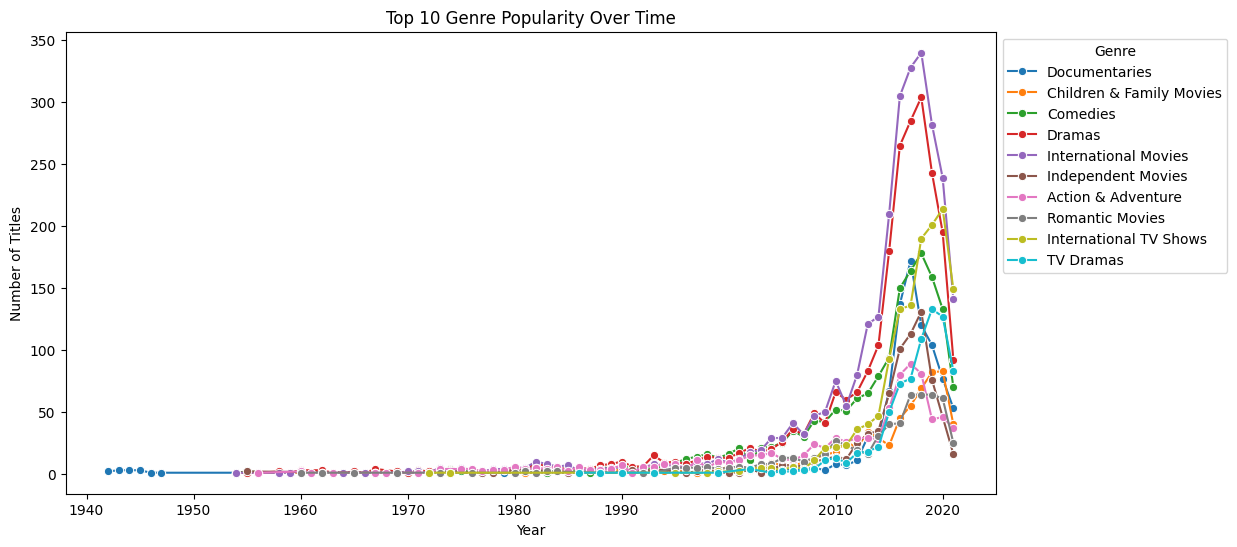

In [ ]:
#Genre Popularity Over Time
import seaborn as sns

# Explode listed_in (genres) into separate rows
df_genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

# Count genres per year
genre_trend = df_genres.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Plot a heatmap of top 10 genres
top_genres = genre_trend.groupby('genre')['count'].sum().nlargest(10).index
filtered_data = genre_trend[genre_trend['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='release_year', y='count', hue='genre', marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Top 10 Genre Popularity Over Time")
plt.legend(title="Genre", bbox_to_anchor=(1,1))
plt.show()


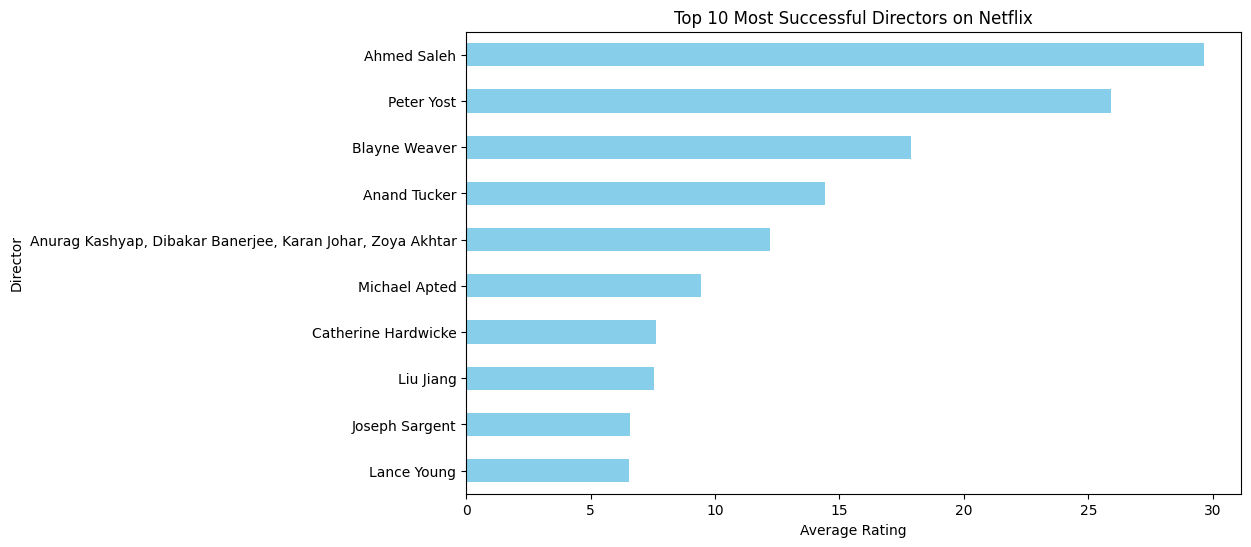

In [ ]:
# most sucessfull directors

# Filter out rows with no director and group by director to find the average rating
top_directors = df.dropna(subset=['director']).groupby('director')['rating'].mean().nlargest(10)

# Plot top-rated directors
top_directors.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.title("Top 10 Most Successful Directors on Netflix")
plt.gca().invert_yaxis()
plt.show()


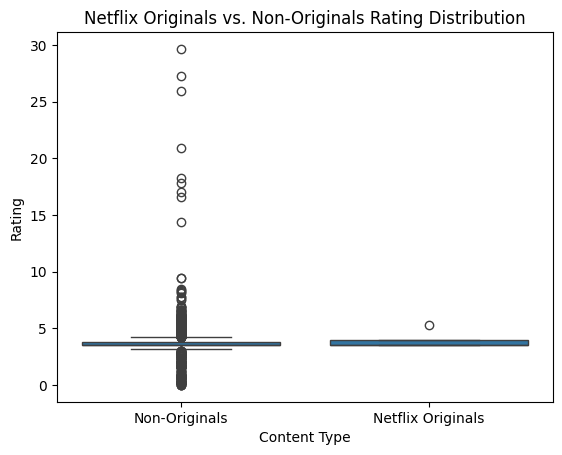

In [ ]:
# Netflix Originals vs. Non-Originals Performance

# Check if "Netflix Original" is in the title
df['is_original'] = df['title'].apply(lambda x: 1 if 'Netflix' in x else 0)

# Compare ratings
sns.boxplot(data=df, x='is_original', y='rating')
plt.xticks([0, 1], ['Non-Originals', 'Netflix Originals'])
plt.xlabel("Content Type")
plt.ylabel("Rating")
plt.title("Netflix Originals vs. Non-Originals Rating Distribution")
plt.show()


In [ ]:
# Country-wise Netflix Preferences
import plotly.express as px

# Explode country column
df_country = df.assign(country=df['country'].str.split(', ')).explode('country')

# Count number of movies per country
country_counts = df_country['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plot a world map
fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                     color='Count', hover_name='Country',
                     title='Number of Netflix Titles by Country', color_continuous_scale='reds')
fig.show()


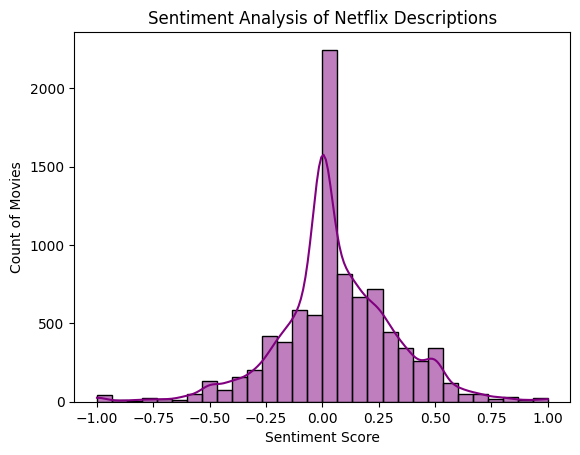

In [ ]:
#  Sentiment Analysis on Movie Descriptions
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['description'].apply(get_sentiment)

# Plot distribution of sentiment
sns.histplot(df['sentiment'], bins=30, kde=True, color="purple")
plt.xlabel("Sentiment Score")
plt.ylabel("Count of Movies")
plt.title("Sentiment Analysis of Netflix Descriptions")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create TF-IDF matrix based on genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['listed_in'].fillna(''))

# Compute similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Function to get recommendations
def get_recommendations(title, df, cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example usage
print(get_recommendations("Inception", df, cosine_sim))


133                 Chappie
143           Green Lantern
327                 Beowulf
581           Mortal Kombat
594               Star Trek
946                Stargate
949        The Darkest Hour
970     Battle: Los Angeles
1036              Time Trap
1113                   2012
Name: title, dtype: object
